# ENGG 27.02 LABORATORY ACTIVITY 1
## Numerical Methods

### 1) RLC Circuit
As shown in the image below, an RLC circuit is composed of three components, mainly: a resistor (R), an an inductor (L), and a capacitor (C).

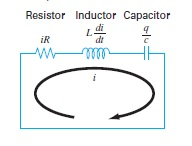

The flow of current across each element induces a voltage drop. Kirchhoff’s second voltage law states that the algebraic sum of these voltages drops around a closed circuit is zero and is given by:

<h1><center>$iR + L\frac{di}{dt} + \frac{q}{c}$</h1></center>

where i = current, R = resistance, L = inductance, t = time, q = charge, and C = capacitance. In addition, the current is related to charge as in:

<h1><center>$\frac{dq}{dc} = i$</h1></center>

### a. Solve using Eulers Method
### b. Create a plot for $i$, $q$, and $t$
### c. Use calculus or a symbolic math package to obtain the numerical solution
If the initial values are $i(0)=0$ and $q(0)=1$, use Euler’s method to solve this pair of differential equations numerically from $t=0$ to $0.1 s$ using a step size of $Δt=0.01 s$. Employ the following parameters for your calculation: $R=200 Ω$, $L=5 H$, and $C=10−4 F$.

In [1]:
using Pkg
Pkg.add("PyPlot")

    Updating registry at `C:\Users\Rodolfo Obre\.julia\registries\General`
    Updating git-repo `https://github.com/JuliaRegistries/General.git`
   Resolving package versions...
   Installed PyPlot ─ v2.9.0
   Installed PyCall ─ v1.92.3
    Updating `C:\Users\Rodolfo Obre\.julia\environments\v1.6\Project.toml`
  [d330b81b] + PyPlot v2.9.0
    Updating `C:\Users\Rodolfo Obre\.julia\environments\v1.6\Manifest.toml`
  [438e738f] + PyCall v1.92.3
  [d330b81b] + PyPlot v2.9.0
    Building PyCall → `C:\Users\Rodolfo Obre\.julia\scratchspaces\44cfe95a-1eb2-52ea-b672-e2afdf69b78f\169bb8ea6b1b143c5cf57df6d34d022a7b60c6db\build.log`
Precompiling project...
  ✓ PyCall
  ✓ PyPlot
2 dependencies successfully precompiled in 22 seconds (217 already precompiled)


In [2]:
function eulers_method(h, r, l, c, t0, tf, i0, q0)
#= Print out the time, current, and charge from the inputs step size, resistance, inductance, conductance,
    initial time, final time, initial current, and initial charge value. Calls the graph function after. =#
    terms = Int(((tf+ 0.01)-t0)/h) #computes for the number of terms and transforms it into an integer
    charge = ([Float64(q0)]); current = ([Float64(i0)]) #converts q0 and i0 into float for solving later
    for i = 1:terms
        push!(charge, (charge[i]+current[i]*h)) #eulers, appends next term into charge array
        push!(current, (current[i]-((current[i]*(r/l) + ((charge[i]/c)/l))*h)))    
        println(round(((i/100)-0.01), sigdigits=2), "            ", charge[i], "                      ",
            current[i])
        i += 1
    end
    graph_rlc(terms, charge, current)
end

eulers_method (generic function with 1 method)

In [3]:
function calculus_method(h, t0, tf)
#= Calculus is used to solve for the solutions for charge and current using the inputs of step size,
    initial time, and final time. Calls the graph function after. =#
    charge = [1.0]; current = [0.0] #arrays that will hold our values
    println(0.0, "           ", charge[1], "       ", current[1])
    terms = Int((tf-t0)/h) #computes for the number of terms and transforms it into an integer
    for i = 2:terms + 1
        t = (i-1)/100 #this becomes 0.0, 0.01, 0.02, 0.03, 0.04
        push!(current, -20*exp(-20t)*(cos(40t) + .5*sin(40t)) + (exp(-20t))*(-40*sin(40t) + 20*cos(40t)))
        push!(charge, exp(-20t)*(cos(40t) + .5*sin(40t))) #formula solved by master of math jg manlapaz     
        println(t, "           ", charge[i], "       ", current[i])
        i += 1
    end 
    graph_rlc(terms, charge, current)
end
#credit kay master jg

calculus_method (generic function with 1 method)

In [ ]:
using Plots; pyplot()
function graph_rlc(terms, fx1, fx2)
#= Graphs the values of the two functions by the time. Takes in an input of the two functions to be 
    graphed. =#
    println("\n Graphing the charge and current against time")
    t = 0:terms #x-axis: 0.0, 0.01, 0.02, 0.03 ...
    plot(t/100, fx1, linewidth=2, label="charge", legend=:bottomright)
    plot!(t/100, fx2, linewidth=2, color="red", label="current") 
    xlims!(0.0,0.1)
    xlabel!("time (s)")
    ylabel!("charge (C) and current (A)")
end

┌ Info: Installing matplotlib via the Conda matplotlib package...
└ @ PyCall C:\Users\Rodolfo Obre\.julia\packages\PyCall\BD546\src\PyCall.jl:711
┌ Info: Running `conda install -y matplotlib` in root environment
└ @ Conda C:\Users\Rodolfo Obre\.julia\packages\Conda\sNGum\src\Conda.jl:128


In [ ]:
println("Use Euler’s method to solve this pair of differential equations numerically from t=0 to 0.1 s using a step size of Δt=0.01 s. Employ the following parameters for your calculation: R=200 Ω, L=5 H, and C=10−4 F.\n")
println("Time(s)       Charge(C)                 Current(A)")

eulers_method(0.01, 200, 5, 10^-4, 0.0, 0.1, 0 ,1)

In [ ]:
println("Use Calculus to solve this pair of differential equations numerically from t=0 to 0.1 s using a step size of Δt=0.01 s. Employ the following parameters for your calculation: R=200 Ω, L=5 H, and C=10−4 F.\n")
println("Time(s)       Charge(C)                Current(A)")

calculus_method(0.01, 0, 0.1)

### 2. Evaluate exponential function $e^{-5}$

Evaluate the function $e^{-5}$ using two approaches. <br>
Given: <br>
$e^-5 = 1 - x + \frac{x^2}{2} - \frac{x^3}{3!} + ...$ <br>
and <br>
$e^-5 = \frac{1}{e^5} = \frac{1}{1 - x + \frac{x^2}{2} - \frac{x^3}{3!} + ...}$ <br>
<br>
Evaluate each series using 20 terms and compute for their true precent relative and approxiamte relative errors as terms are added. Compare the approximated value to the true value of $6.737947x10^{-3}$ Explain the reason if there are discrepancies in the errors.

#### First Approach

In [ ]:
n = 20 # Where n is the number of iterations

function approach1(x)
    new_sumOdd = 0 # new odd term
    new_sumEven = 0 # new even term
    sumOdd = 0 # current odd term
    sumEven = 0 # current even term
    sumTotal = 0 # sum of the entire series
    trueValue = ℯ^(-5) 
    
    println("Term #    Approximation               True Error          Relative Error" )
    
    for i in 1:n
        if (i-1)%2 != 0
            new_sumOdd = sumOdd - x^(i-1)/factorial(i-1)
            new_sumTotal = new_sumOdd + new_sumEven
            trueError = abs((trueValue - new_sumTotal)/trueValue)*100
            approxError = abs((new_sumTotal - sumTotal)/new_sumTotal)*100
            println(i, "\t", new_sumOdd + new_sumEven, "\t", trueError, "%", "\t", approxError, "%")
            sumTotal = new_sumTotal
            sumOdd = new_sumOdd
        elseif (i-1)%2 == 0
            new_sumEven = sumEven + x^(i-1)/factorial(i-1)
            new_sumTotal = new_sumOdd + new_sumEven
            trueError = abs((trueValue - new_sumTotal)/trueValue)*100
            approxError = abs((new_sumTotal - sumTotal)/new_sumTotal)*100
            println(i, "\t", new_sumOdd + new_sumEven, "\t", trueError, "%", "\t", approxError, "%")
            sumTotal = new_sumTotal
            sumEven = new_sumEven
        end
    end
    sumTotal = sumOdd + sumEven
end
println("e^-5 = ", approach1(5))

#### Second Approach

In [ ]:
n = 20 # Where n is the number of iterations

function approach2(x)
    new_sum = 0
    sum = 0
    trueValue = ℯ^-5
    println("Term #    Approximation               True Error          Relative Error" )
    
    for i in 1:n
        new_sum = sum + x^(i-1)/factorial(i-1)
        trueError = abs((trueValue - (1/new_sum))/trueValue)*100
        approxError = abs(((1/new_sum) - (1/sum))/(1/new_sum))*100
        println(i,  "\t", 1/sum, "\t", trueError, "%", "\t", approxError, "%")
        sum = new_sum
    end
    1/sum
end
println("e^-5 = ", approach2(5))

#### Conclusion
By definition, the numerical error, or the discrepancy between the true value and the approximation, for the first approach is $0.000031605944869897$, while for the second approach it is $-0.000000002326031623$‬.The second approach is closer to the true value of e^-5. <br>
    
The approximation of the first approach is accurate up to <b>five (5) significant figures</b>, while the approximation of the second approach is accurate up to <b>nine (9) significant figures</b>. The approximation of the second approach is more accurate than the approximation of the first approach. <br>
    
The true percent relative error of the first approach is $0.4690738124563327%$, while the true percent relative error of the second approach is $0.00003452137013995593%$. The second approach has a significantly lower true percent relative error. <br>
    
The approximate error of the first approach is $2.3380286316698853%$, while the approximate error of the second approach is $0.000010564857908971307%$. The approximate error of the second approach is significantly lower than the approximate error of the first approach. <br>
    
Overall, the second approach is more accurate and precise than the first approach based on the acquired dataset. <br>

The discrepancies between the values are due to the fact that, in the first approach, its formula considers both positive and negative values. The negative values are eliminated in the formula of the second approach, and thus this is able to provide a more accurate and precise approximation.

### 3. Evaluate the Maclaurin Series Expansion of $cos(x)$

Given: <br>
$cos (x) = 1 - \frac{x^2}{2} + \frac{x^4}{4!} + \frac{x^6}{6!} + \frac{x^8}{8!} + ...$ <br>
Starting with the simplest version, $cos x = 1$, add terms one at a time to estimate $cos (\frac{\pi}{3})$. <br>

After each new term is added, compute the true and approximate percent relative errors. Use Julia to determine the true value. <br>

Add terms until the absolute value of the approximate error estimate falls below an error criterion conforming to two significant figures. Explain the reason if there are discrepancies in the errors.

In [ ]:
function maclaurin_cos_expansion(x, sigfigs)
#= Print out the term number, term, and then compute the true and approximate relative errors by comparing 
    it to the true value. Takes an input of x of cos(x). Call graph function after. =#
    true_value = cos(x); true_error = 1; i = 2; approximate_error = 1
    approximation = ([0.0, 1.0]) #array that will hold the approximations
    specified_tolerance = 0.5*10^(2-sigfigs) #stopping criterion
    println("Term #    Approximation               True Error          Relative Error")
    while approximate_error > specified_tolerance 
        true_error = abs((true_value - approximation[i])/true_value)*100
        approximate_error = abs((approximation[i]-approximation[i-1])/approximation[i])*100
        println(i-1, "          ", approximation[i], "       ", true_error, "%      ", approximate_error,"%") 
        push!(approximation, (approximation[i]+((((-1)^(i-1))*(x^2(i-1)))/(factorial(big(2*(i-1)))))))
        i += 1
    end
    graph_against_true_value(i, approximation, true_value)
end

In [ ]:
using Plots; pyplot()
function graph_against_true_value(terms, fx, true_value)
#= Graphs the approximations by the number of terms and superimposes the true value. Takes
    in the number of terms, the array to be approximated, and the true value to be superimposed as a
    horizontal line. =#
    println("\n Graphing the approximations against the true value")
    t = 1:terms #x-axis 
    true_plot = []
    plot(t, fx, linewidth=2, label="numerical approximation", markershape = :circle)
    for i = 0:terms #make an array with a size of terms full of true value to plot a horizontal line
        push!(true_plot, true_value)
    end
    plot!(t, true_plot, linewidth=2, color="red", label="true value") #plot str8 line of true value
    xlabel!("terms")
    ylabel!("approximation")
end

In [ ]:
println("Estimating value of cos(pi/3) using Mclaurin Series Expansion")
println("True value of cos(pi/3) = ", cos((pi)/3) ,"\n")

maclaurin_cos_expansion((pi)/3, 2)

#### Conclusion
The numerical error, or the discrepancy between the true value and the approximation, is $0.0000354346710874$. <br>

This value could have been mitigated better with more iterations and terms, which was not possible due to the specified percent tolerance of $0.5\%$, maintaining the stopping criteria of an accuracy within 2 significant figures, which is evident in the comparison between the true value and the approximation.

### References
1. Juan Glicerio C. Manlapaz - for the 1.c. Calculus Method formula